In [1]:
# Import all dependencies
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit the Mars temperature
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
# Parse the HTML
html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
#Find the table information
table = html_soup.find('table', class_="table")

In [6]:
#get the column headers
headers=[]
for header in table.find_all('th'):
    title=header.text
    headers.append(title)

In [7]:
#create a dataframe
mars_temp=pd.DataFrame(columns=headers)

In [8]:
#create a loop and fill in the table
for data in table.find_all("tr", class_="data-row"):
    row_data=data.find_all("td")
    row=[header.text for header in row_data]
    length = len(mars_temp)
    mars_temp.loc[length] = row

In [9]:
mars_temp

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [10]:
mars_temp.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
mars_temp["id"]=mars_temp.id.astype(int)
mars_temp["terrestrial_date"]=pd.to_datetime(mars_temp["terrestrial_date"])
mars_temp["sol"]=mars_temp.sol.astype(int)
mars_temp["ls"]=mars_temp.ls.astype(int)
mars_temp["month"]=mars_temp.month.astype(int)
mars_temp["min_temp"]=mars_temp.min_temp.astype(float)
mars_temp["pressure"]=mars_temp.pressure.astype(float)

In [12]:
mars_temp.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [13]:
mars_temp.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


Questions

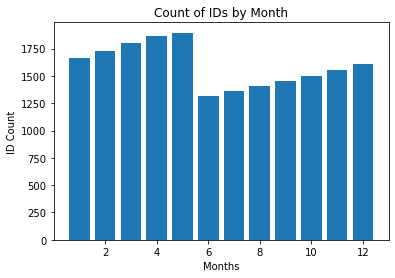

In [14]:
#how many months exist. graph the Month by ID
plt.bar(mars_temp["month"],mars_temp["id"])
plt.title("Count of IDs by Month")
plt.xlabel("Months")
plt.ylabel("ID Count")
plt.show()

In [15]:
#Which month, on average, has the lowest temperature? The highest?
avg_by_month = mars_temp.groupby(["month"]).mean()[["min_temp"]]
avg_by_month

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


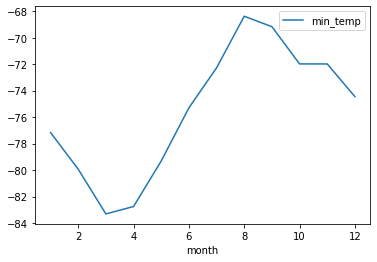

In [16]:
avg_by_month.plot()
plt.show()

In [17]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset?
#That is, in the time that Mars circles the Sun once, how many days elapse on Earth? how many days per year
#dates=mars_temp["terrestrial_date"].groupby([terrestrial_date.dt.year, terrestrial_date.dt.month]).agg("count")

year = mars_temp.groupby(pd.Grouper(key='terrestrial_date', freq='Y')).count()
days_per_year=pd.DataFrame(year["id"])
days_per_year.rename(columns={"id": "Count"})
days_per_year


,id
terrestrial_date,
2012-12-31,130
2013-12-31,290
2014-12-31,355
2015-12-31,340
2016-12-31,345
2017-12-31,351
2018-12-31,56


In [18]:
#plot the Terrestrial_date by the temperature
terrestrial_days = mars_temp[['terrestrial_date', 'min_temp']]
terrestrial_days

,terrestrial_date,min_temp
0,2012-08-16,-75.0
1,2012-08-17,-76.0
2,2012-08-18,-76.0
3,2012-08-19,-74.0
4,2012-08-20,-74.0
...,...,...
1862,2018-02-23,-78.0
1863,2018-02-24,-77.0
1864,2018-02-25,-76.0
1865,2018-02-26,-77.0


<AxesSubplot:xlabel='min_temp'>

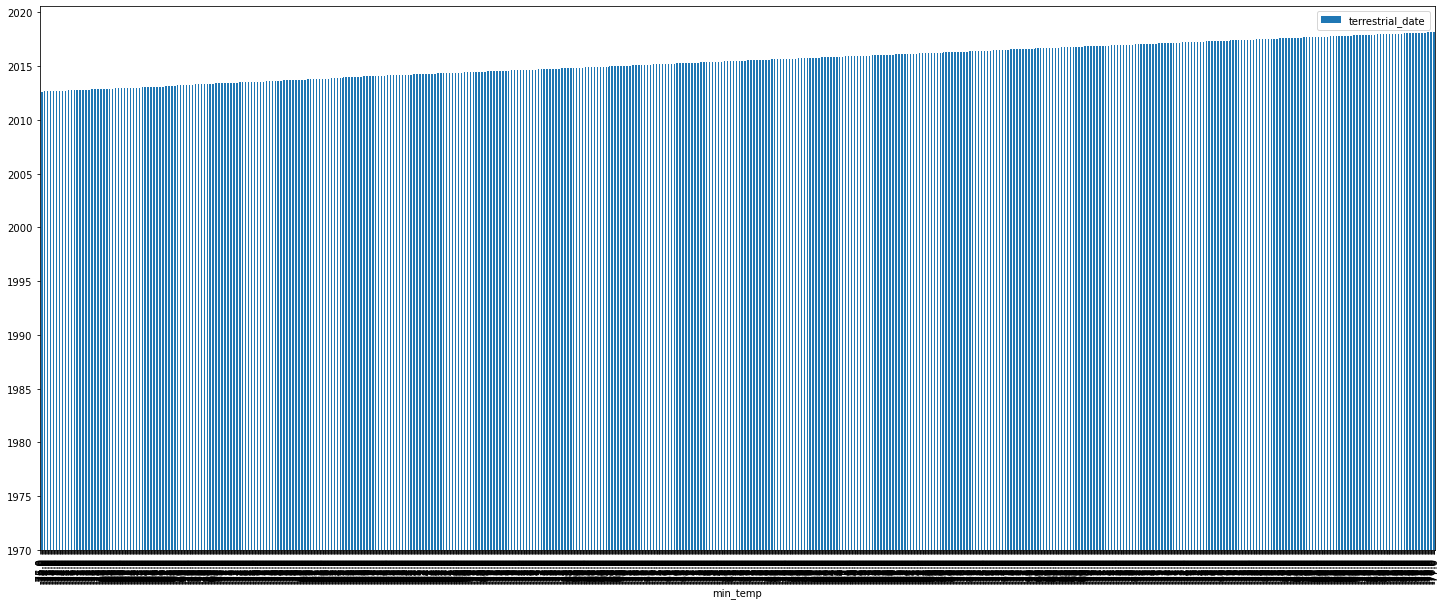

In [20]:
terrestrial_days.plot.bar(y='terrestrial_date', x='min_temp', figsize=(25,10))